In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.exceptions as px

In [61]:
df=pd.read_csv('/1730285881-Airbnb_Open_Data.csv',low_memory = False)

In [62]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,05/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [64]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,06/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [65]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.drop(['house_rules','license'],axis=1,inplace=True)

In [68]:
df['price']=df['price'].str.replace('$','',regex=False)

AttributeError: Can only use .str accessor with string values!

In [ ]:
df['service fee']=df['service fee'].str.replace('$','',regex=False)

In [69]:
df.dropna(inplace=True)

In [70]:
property_types=df['room type'].value_counts().to_frame()
property_types


,count
room type,
Entire home/apt,44164
Private room,37494
Shared room,1646
Hotel room,108


In [71]:
neighbourhood_listings = df['neighbourhood group'].value_counts().to_frame()
print("Number of listings per neighborhood group:")
display(neighbourhood_listings)

Number of listings per neighborhood group:


,count
neighbourhood group,
Brooklyn,34635
Manhattan,34567
Queens,11126
Bronx,2267
Staten Island,816
brookln,1


The table above shows the count of listings for each neighborhood group. The group with the highest count is at the top of the table.

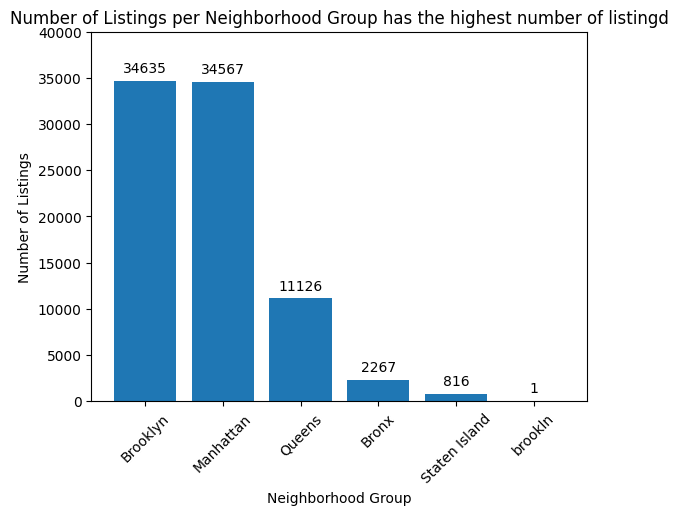

In [72]:
hood_group_bar = plt.bar(neighbourhood_listings.index,neighbourhood_listings.loc[:,"count"]);
plt.bar_label(hood_group_bar,labels=neighbourhood_listings.loc[:,"count"],padding=4);
plt.ylim(0,40000)
plt.xticks(rotation=45);
plt.xlabel("Neighborhood Group");
plt.ylabel("Number of Listings");
plt.title("Number of Listings per Neighborhood Group has the highest number of listingd");

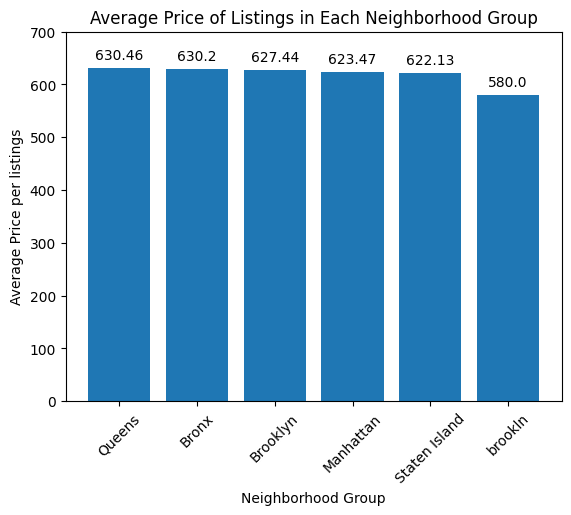

In [78]:
avg_price =df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,'price']);
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,"price"],2),label_type='edge',padding=4);
plt.ylim([0,700]);
plt.xticks(rotation=45);
plt.xlabel("Neighborhood Group");
plt.ylabel("Average Price per listings");
plt.title("Average Price of Listings in Each Neighborhood Group");


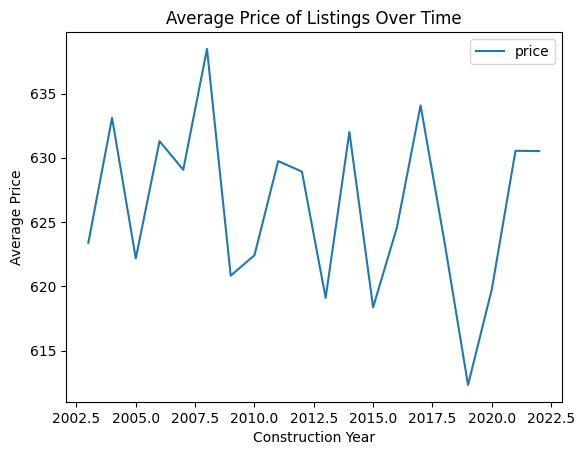

In [77]:
df.groupby(df['Construction year'])['price'].mean().to_frame().plot();
plt.xlabel("Construction Year");
plt.ylabel("Average Price");
plt.title("Average Price of Listings Over Time");

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 157 (\x9d) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 144 (\x90) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 129 (\x81) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 143 (\x8f) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 141 (\x8d) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 157 (\x9d) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 144 (\x90) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabt

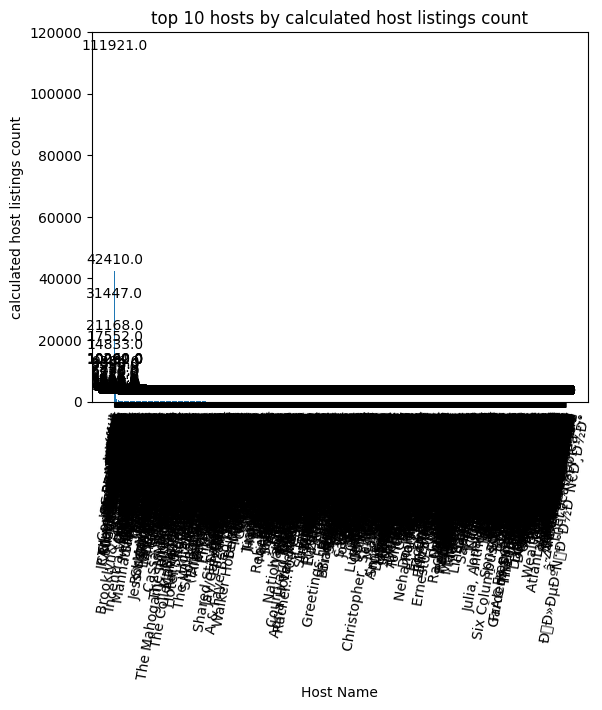

In [73]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).to_frame()
hosts_bar = plt.bar(hosts.index,hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar,labels=hosts.loc[:,"calculated host listings count"],padding=3,label_type='edge');
plt.xticks(rotation=80);
plt.xlabel("Host Name");
plt.ylabel('calculated host listings count');
plt.title('top 10 hosts by calculated host listings count');
plt.ylim(0,120000);


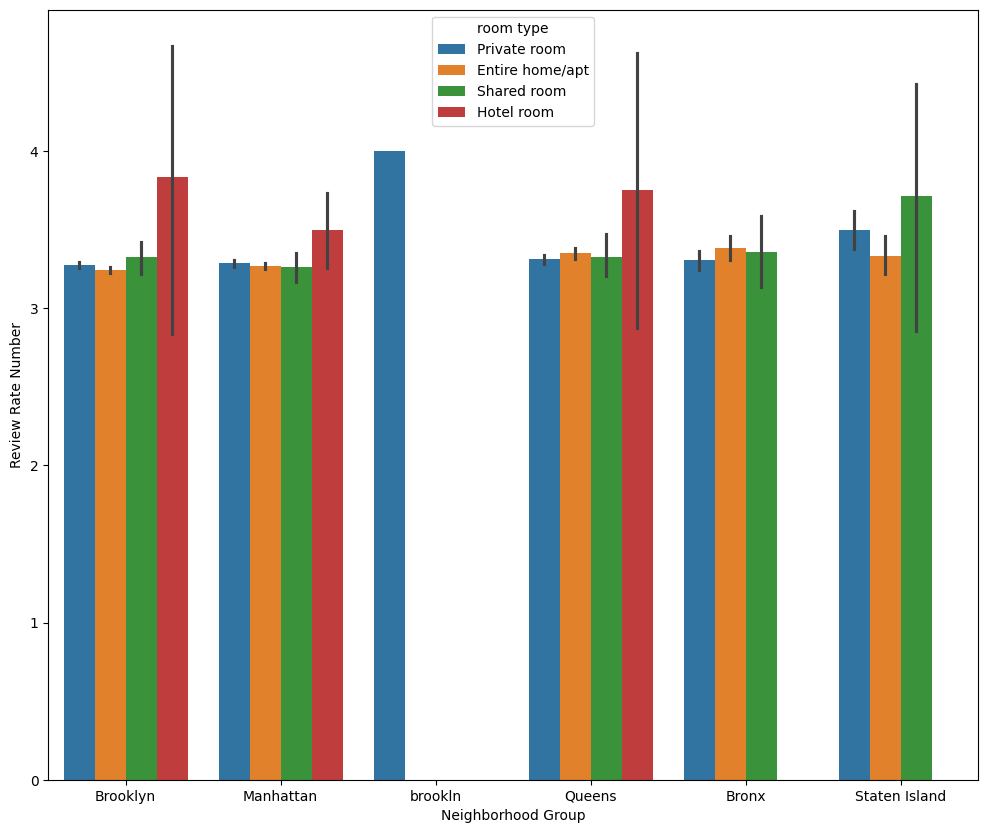

In [74]:
plt . figure(figsize=[12,10]);
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type');
plt.xlabel('Neighborhood Group');
plt.ylabel('Review Rate Number');

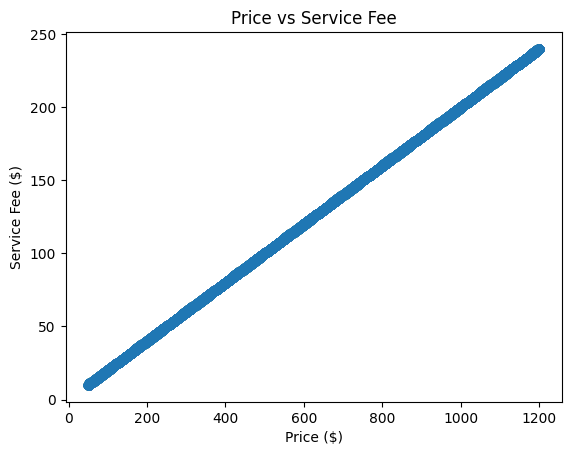

In [75]:
sns.regplot(df,x='price',y='service fee');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)')
plt.title('Price vs Service Fee');

Text(0.5, 1.0, 'Calculated Host Listings Count and Availability 365')

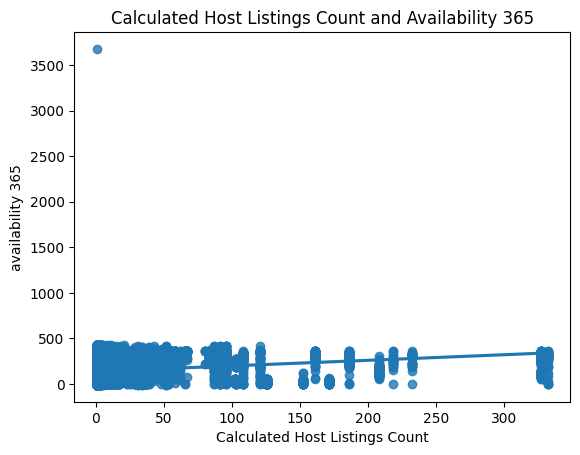

In [76]:
sns.regplot(df,x='calculated host listings count',y='availability 365');
plt.xlabel('Calculated Host Listings Count');
plt.ylabel('availability 365');
plt.title('Calculated Host Listings Count and Availability 365')